In [1]:
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf


In [27]:
!pip install py-openaq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=b51ef72a7bd8468d5bb0e364249acd75f886df50d06afbc143b1f494a7ae0353
  Stored in directory: /root/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [44]:
! pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import openaq
# Import Meteostat library and dependencies
from meteostat import Point, Hourly, Daily

openaq = openaq.OpenAQ(version="v2")

class Location:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon

locations_IT = []

cities = openaq.cities(country="In", limit=100000, df=True)["city"]

for city in cities:
    print(city) 
    try:
        res = openaq.locations(city=city, df=True)[["coordinates.latitude","coordinates.longitude"]].mean()
    
        locations_IT.append(Location(city, res["coordinates.latitude"], res["coordinates.longitude"]))
    except:
        print("-----------Skipped {}-----------".format(city))


Agartala
Agra
Ahmedabad
Aizawl
Ajmer
Alwar
Amaravati
Ambala
Amritsar
Ankleshwar
Araria
Arrah
Asansol
Aurangabad
Baddi
Bagalkot
Baghpat
Bahadurgarh
Ballabgarh
Barddhaman
-----------Skipped Barddhaman-----------
Bareilly
Bathinda
Begusarai
Bengaluru
Bettiah
Bhagalpur
Bhilai
Bhiwadi
Bhiwani
Bhopal
Bidar
Bihar Sharif
Bilaspur
Brajrajnagar
Bulandshahr
Buxar
Chamarajanagar
Chandigarh
Chandrapur
Charkhi Dadri
Chennai
Chhapra
Chikkaballapur
Chikkamagaluru
Coimbatore
Damoh
Darbhanga
Davanagere
Dehradun
Delhi
Dewas
Dharuhera
Durgapur
Eloor
Ernakulam
Faridabad
Fatehabad
Firozabad
Gadag
Gandhinagar
Gangtok
Gaya
Ghaziabad
Gorakhpur
Greater Noida
Gummidipoondi
Gurugram
Guwahati
Gwalior
Hajipur
Haldia
Hapur
Hassan
Haveri
Hisar
Howrah
Hubballi
Hyderabad
Imphal
India
Indore
Jabalpur
Jaipur
Jalandhar
Jhansi
Jind
Jodhpur
Jorapokhar
Kaithal
Kalaburagi
Kalaburgi
-----------Skipped Kalaburgi-----------
Kalyan
Kannur
Kanpur
Karnal
Katihar
Katni
Khanna
Khurja
Kishanganj
Kochi
Kohima
Kolar
Kolkata
Kollam
Koppa

In [46]:
from datetime import datetime, timedelta
import time
import pandas as pd

# Delhi index 48
selected_location = locations_IT[48]
print(selected_location.name)
# Format coordinates to align with OpenAQ standards
coordinates = "{},{}".format(round(selected_location.lat, 8), round(selected_location.lon, 8))

now = datetime(2021,10,1)

# For some reason the OpenAQ API accepts the date only in this way
date_from = datetime(2020 , 5, 10)
date_to = datetime(now.year, now.month, now.day) + timedelta(days=1)

print("Time Range: {} - {}".format(date_from, date_to))

selected_pollutants = ['pm25','pm10','no2','o3','so2','co']

# Create empty Dataframe
df_pollutants = pd.DataFrame(columns=selected_pollutants)

# getPollutants()

for pollutant in selected_pollutants:
    locations = openaq.locations(coordinates=coordinates, parameter=pollutant, radius=20000, df=True, has_geo=True)

    dfs_array = []
    for location in locations["id"]:
        try:
            time.sleep(3)
            df = openaq.measurements(location=location,
                                     date_from=date_from.date(), 
                                     date_to=date_to.date(),
                                     limit=100000, 
                                     parameter=pollutant,
                                     df=True,
                                     sort="asc")[["value"]].resample('H').mean()
            
            dfs_array.append(df)
            print("Added location {}".format(location))
        
        except:
            print("Skipped location {}".format(location))
    
    dfs_array = sorted(dfs_array,key=lambda x:x.index[0])
    df_pollutants[pollutant] = pd.concat(dfs_array, join="outer", axis = 1, sort=False).mean(axis=1)
    print("Added pollutant {}".format(pollutant))
    print("---------------------")

print("Data fetching completed!")

df_pollutants



Delhi
Time Range: 2020-05-10 00:00:00 - 2021-10-02 00:00:00


Added location 11603
Added location 6938
Added location 8475
Added location 6957
Added location 8472
Added location 10831
Added location 6960
Added location 5627
Skipped location 345258
Skipped location 345277
Skipped location 345379
Added location 231522
Added location 231525
Skipped location 345260
Skipped location 345285
Added location 6934
Skipped location 314917
Skipped location 314854
Added location 5586
Added location 5626
Added location 11607
Added location 6358
Added location 6931
Added location 5634
Skipped location 345216
Skipped location 345281
Skipped location 345384
Skipped location 275713
Skipped location 345261
Skipped location 345280
Skipped location 345283
Skipped location 345268
Added location 10486
Skipped location 345276
Skipped location 345367
Skipped location 5541
Skipped location 314842
Skipped location 314884
Skipped location 62543
Added location 231401
Skipped location 231494
Skipped location 325556
Skipped location 273205
Skipped location 299901
Skipped locat

,pm25,pm10,no2,o3,so2,co
date.local,,,,,,
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333
...,...,...,...,...,...,...
2021-10-02 01:00:00,56.000000,NaN,NaN,NaN,NaN,NaN
2021-10-02 02:00:00,56.000000,NaN,NaN,NaN,NaN,NaN
2021-10-02 03:00:00,63.000000,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b795fc950>,
      dtype=object)

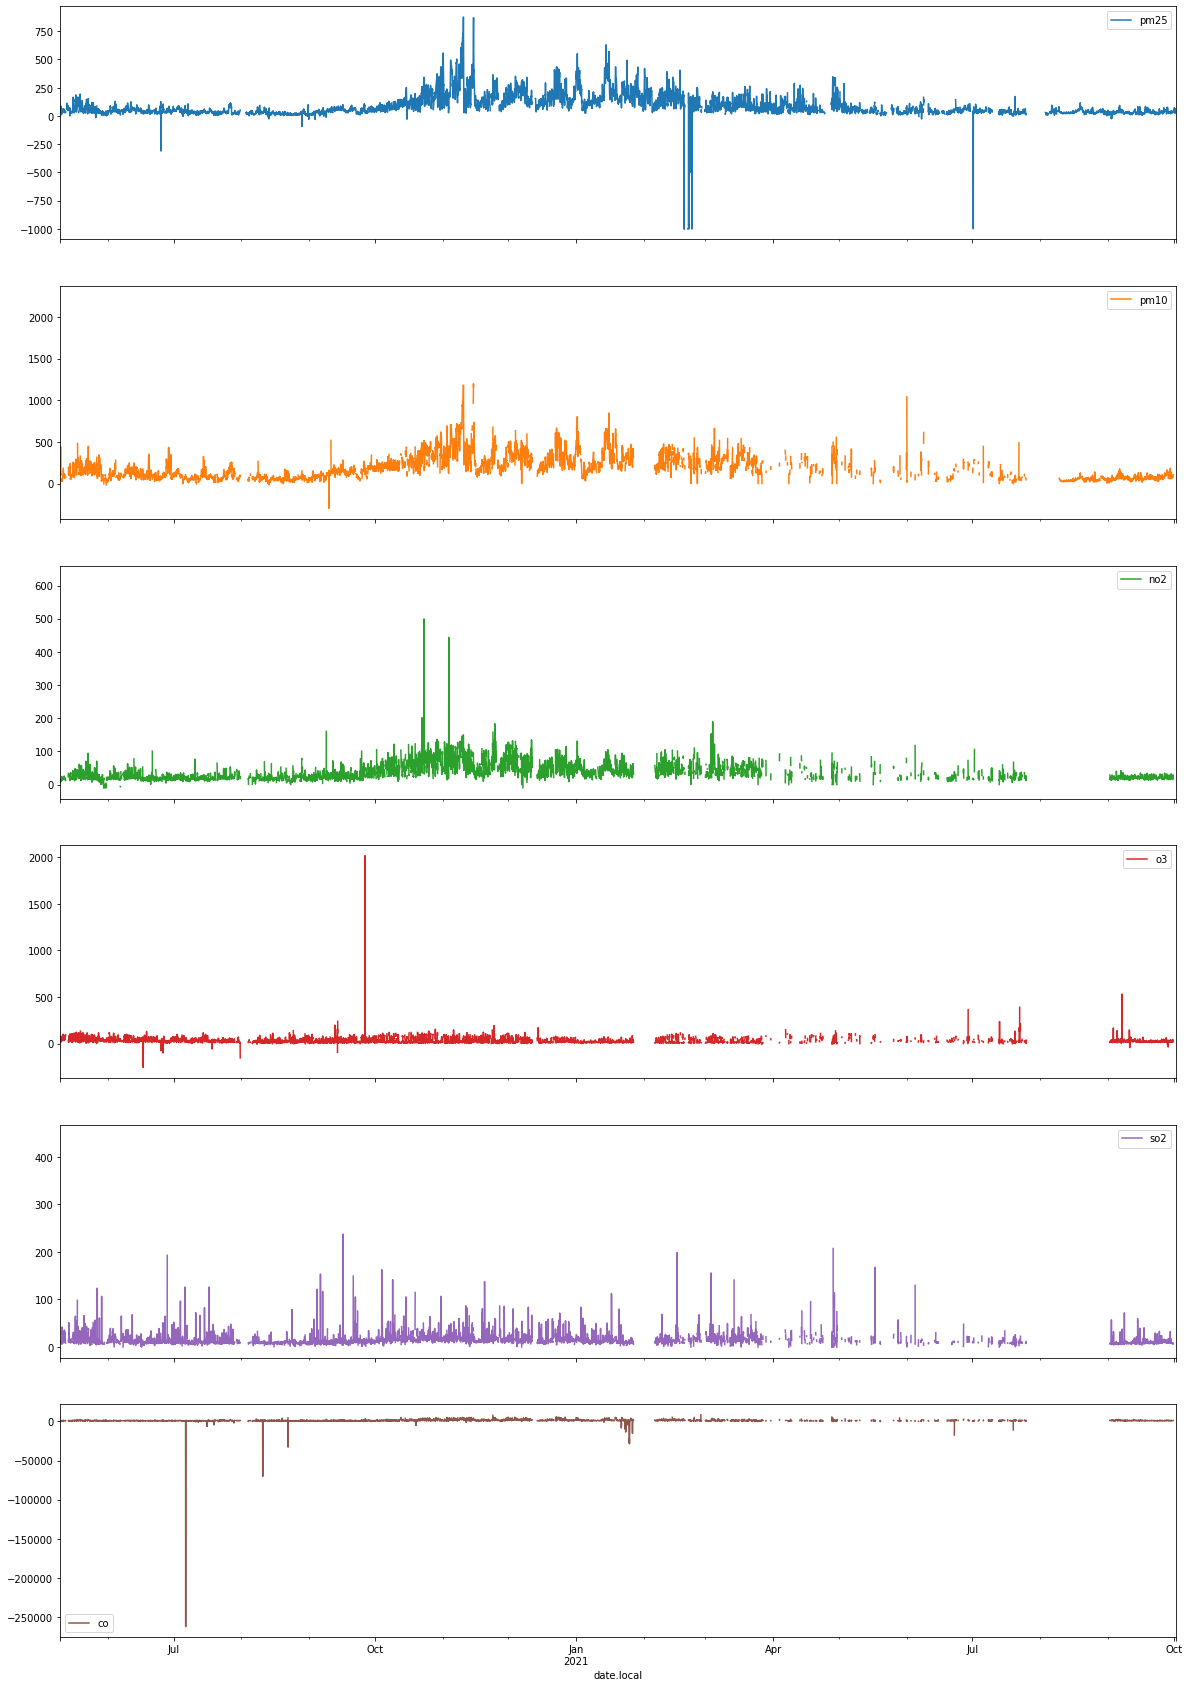

In [47]:
df_pollutants.plot(figsize=(20,30), subplots=True)



In [48]:
# Create Point for delhi
# We will give the median between the maximum: 17m, minimum: 0m elevation of delhi

loc = Point(selected_location.lat, selected_location.lon, 9.5)

# temp  The air temperature in °C
# dwpt  The dew point in °C
# rhum  The relative humidity in percent (%)
# prcp  The one hour precipitation total in mm
# snow  The snow depth in mm
# wdir  The average wind direction in degrees (°)
# wspd  The average wind speed in km/h
# wpgt  The peak wind gust in km/h
# pres  The average sea-level air pressure in hPa
# tsun  The one hour sunshine total in minutes (m)
# coco  The weather condition code

# Get hourly data
df_weather = Hourly(loc=loc, start=date_from, end=date_to)
df_weather = df_weather.normalize()
df_weather = df_weather.fetch()

# Remove columns that hold no values
weather_features = ['dwpt', 'prcp', 'snow', 'wdir', 'wpgt', 'tsun']
df_weather.drop(weather_features, axis=1, inplace=True)
# df_weather = df_weather.interpolate(method='time')

final_df = df_pollutants.merge(df_weather, left_index=True, right_index=True)

final_df


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632,34.3,53.0,14.8,1006.3,2.0
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138,36.4,47.0,11.2,1006.5,2.0
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524,36.3,46.0,13.0,1006.1,2.0
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396,37.1,43.0,11.1,1005.6,2.0
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333,27.2,66.0,13.0,1008.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,NaN,NaN,NaN,NaN,NaN,29.0,91.0,0.0,1007.7,2.0
2021-10-01 21:00:00,58.000000,NaN,NaN,NaN,NaN,NaN,29.0,94.0,0.0,1008.6,2.0
2021-10-01 22:00:00,50.000000,NaN,NaN,NaN,NaN,NaN,28.9,91.0,1.8,1007.6,2.0
2021-10-01 23:00:00,49.000000,NaN,NaN,NaN,NaN,NaN,28.6,91.0,1.8,1007.4,2.0


In [49]:
#Fill empty values 
cols_with_Nan = final_df.columns[final_df.isnull().any()].tolist()

if cols_with_Nan:
    for col in cols_with_Nan:
        print(col)
        while(final_df[col].isnull().sum() > 0):
            final_df[col] = final_df[col].fillna(final_df[col].rolling('4D',min_periods=1).mean())
        final_df[col] = final_df[col].interpolate(method='time', limit_direction='both')
        
final_df.isnull().sum()



pm25
pm10
no2
o3
so2
co


pm25    0
pm10    0
no2     0
o3      0
so2     0
co      0
temp    0
rhum    0
wspd    0
pres    0
coco    0
dtype: int64

# Calculate AQI for each pollutant

EEA AQI TABLE

| Key | Category | PM2,5 μg/m³ | PM10 μg/m³ | NO2 ppb | O3 ppb | SO2 ppb
| :- | :- | :- | :- | :- | :- | :- |
| 1 | Good | 0-10 | 0-20 | 0-40 | 0-50 | 0-100 | 
| 2 | Fair | 10-20 | 20-40 | 40-90 | 50-100 | 100-200 | 
| 3 | Moderate | 20-25 | 40-50 | 90-120 | 100-130 | 200-350 | 
| 4 | Poor | 25-50 | 50-100 | 120-230 | 130-240 | 350-500 |
| 5 | Very Poor | 50-75 | 100-150 | 230-340 | 240-380 | 500-750 |
| 6 | Extremely Poor | 75-800 | 150-1200 | 340-1000 | 380-800 | 750-1250 |

We will use key numbers for each category:

Good: 1
Fair: 2
Moderate: 3
Poor: 4
Very Poor: 5
Extremely Poor: 6


In [50]:
### Define functions to calculate AQI for each pollutant



def calcPM25(x):
    if x <= 10:
        return 1
    elif x >=11 and x <= 20:
        return 2
    elif x >=21 and x <= 25:
        return 3
    elif x >=26 and x <= 50:
        return 4
    elif x >=51 and x <= 75:
        return 5
    elif x >=76:
        return 6
    else:
        return 1
    
def calcPM10(x):
    if x <= 20:
        return 1
    elif x >=21 and x <= 40:
        return 2
    elif x >=41 and x <= 50:
        return 3
    elif x >=51 and x <= 100:
        return 4
    elif x >=101 and x <= 150:
        return 5
    elif x >=151:
        return 6
    else:
        return 1
    
def calcNO2(x):
    if x <= 40:
        return 1
    elif x >=41 and x <= 90:
        return 2
    elif x >=91 and x <= 120:
        return 3
    elif x >=121 and x <= 230:
        return 4
    elif x >=231 and x <= 340:
        return 5
    elif x >=341:
        return 6
    else:
        return 1
    
def calcO3(x):
    if x <= 50:
        return 1
    elif x >=51 and x <= 100:
        return 2
    elif x >=101 and x <= 130:
        return 3
    elif x >=131 and x <= 240:
        return 4
    elif x >=241 and x <= 380:
        return 5
    elif x >=381:
        return 6
    else:
        return 1
    
def calcSO2(x):
    if x <= 100:
        return 1
    elif x >=101 and x <= 200:
        return 2
    elif x >=201 and x <= 350:
        return 3
    elif x >=351 and x <= 500:
        return 4
    elif x >=501 and x <= 750:
        return 5
    elif x >=751:
        return 6
    else:
        return 1

    
final_df["pm25_AQI"] = final_df["pm25"].apply(lambda x: calcPM25(x))
final_df["pm10_AQI"] = final_df["pm10"].apply(lambda x: calcPM10(x))
final_df["no2_AQI"] = final_df["no2"].apply(lambda x: calcNO2(x))
final_df["o3_AQI"] = final_df["o3"].apply(lambda x: calcO3(x))
final_df["so2_AQI"] = final_df["so2"].apply(lambda x: calcSO2(x))


# final_df["overall_AQI"] = max(final_df[["pm25_AQI", "pm10_AQI", "o3_AQI", "so2_AQI", "co_AQI"]])
final_df["overall_AQI"] = final_df[["pm25_AQI","pm10_AQI","no2_AQI","o3_AQI","so2_AQI"]].max(axis=1)

final_df


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632,34.3,53.0,14.8,1006.3,2.0,5,5,1,2,1,5
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138,36.4,47.0,11.2,1006.5,2.0,5,5,1,1,1,5
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524,36.3,46.0,13.0,1006.1,2.0,5,5,1,1,1,5
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396,37.1,43.0,11.1,1005.6,2.0,5,5,1,2,1,5
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333,27.2,66.0,13.0,1008.3,2.0,5,5,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247257,21.684876,19.913027,10.997194,1016.422158,29.0,91.0,0.0,1007.7,2.0,5,4,1,1,1,5
2021-10-01 21:00:00,58.000000,96.377594,21.543178,19.888464,11.030029,1009.786225,29.0,94.0,0.0,1008.6,2.0,5,4,1,1,1,5
2021-10-01 22:00:00,50.000000,95.480870,21.432849,19.918104,11.053945,1005.930027,28.9,91.0,1.8,1007.6,2.0,4,4,1,1,1,4
2021-10-01 23:00:00,49.000000,94.638354,21.322312,19.974035,11.027061,1002.761085,28.6,91.0,1.8,1007.4,2.0,4,4,1,1,1,4


### Change type of each value for memory performance

import numpy as np
final_df = final_df.astype(np.float32)
final_df.info()

# Data Correlation

The Pearson's Correlation Coefficient is also known as the Pearson Product-Moment Correlation Coefficient. It is a measure of the linear relationship between two random variables - X and Y. Mathematically, if (σXY) is the covariance between X and Y, and (σX) is the standard deviation of X, then the Pearson's correlation coefficient ρ is given by:

ρxy = σxy / ( σx * σy )

Pearson



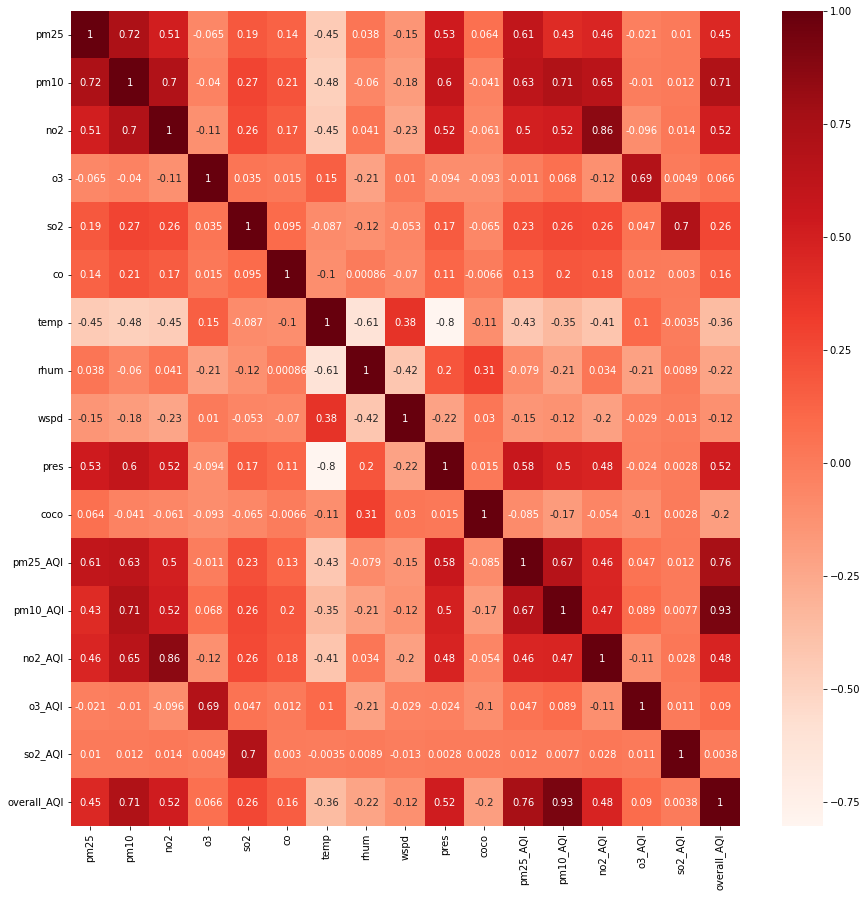

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
cor = final_df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [52]:
final_df.columns

dataset = final_df.copy()
dataset


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,coco,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
2020-05-10 05:00:00,58.034211,110.055556,13.585500,52.262105,11.142778,771.052632,34.3,53.0,14.8,1006.3,2.0,5,5,1,2,1,5
2020-05-10 06:00:00,58.122581,119.764643,13.946207,46.129310,12.405385,776.624138,36.4,47.0,11.2,1006.5,2.0,5,5,1,1,1,5
2020-05-10 07:00:00,58.029293,117.268556,13.009877,50.262167,11.643125,744.784524,36.3,46.0,13.0,1006.1,2.0,5,5,1,1,1,5
2020-05-10 08:00:00,57.566275,120.596774,13.470699,56.497151,12.205357,787.172396,37.1,43.0,11.1,1005.6,2.0,5,5,1,2,1,5
2020-05-10 09:00:00,52.736923,117.967778,10.979615,43.265000,9.713333,882.083333,27.2,66.0,13.0,1008.3,2.0,5,5,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247257,21.684876,19.913027,10.997194,1016.422158,29.0,91.0,0.0,1007.7,2.0,5,4,1,1,1,5
2021-10-01 21:00:00,58.000000,96.377594,21.543178,19.888464,11.030029,1009.786225,29.0,94.0,0.0,1008.6,2.0,5,4,1,1,1,5
2021-10-01 22:00:00,50.000000,95.480870,21.432849,19.918104,11.053945,1005.930027,28.9,91.0,1.8,1007.6,2.0,4,4,1,1,1,4
2021-10-01 23:00:00,49.000000,94.638354,21.322312,19.974035,11.027061,1002.761085,28.6,91.0,1.8,1007.4,2.0,4,4,1,1,1,4


#split data

In [53]:
from sklearn.model_selection import train_test_split

features=dataset.values
targets=dataset[["pm25", "pm10", "no2", "o3", "so2"]].values

X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (9910, 17)
X_test: (1224, 17)


In [54]:
# normalize 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((9910, 17), (1224, 17))

In [55]:
#Setup timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

win_length=12
batch_size=4
num_features=features.shape[1]

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

train_generator[0]


(array([[[0.56365065, 0.2729785 , 0.03717567, 0.13531226, 0.0250287 ,
          0.97180345, 0.70657277, 0.46590909, 0.12111293, 0.50147493,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56369777, 0.27946919, 0.03774063, 0.13261129, 0.02786475,
          0.97182404, 0.75586854, 0.39772727, 0.09165303, 0.50737463,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56364803, 0.27780051, 0.0362741 , 0.13443146, 0.02615257,
          0.97170636, 0.75352113, 0.38636364, 0.10638298, 0.49557522,
          0.04166667, 0.8       , 0.8       , 0.        , 0.        ,
          0.        , 0.8       ],
         [0.56340113, 0.28002548, 0.03699586, 0.13717743, 0.02741545,
          0.97186303, 0.77230047, 0.35227273, 0.0908347 , 0.48082596,
          0.04166667, 0.8       , 0.8       , 0.        , 0.2       ,
          0.        , 0.8       ],
         [0.56082594

LSTM WITH DENSE

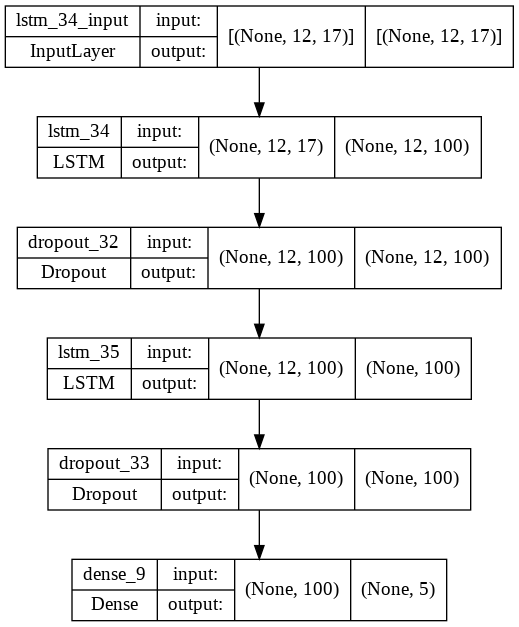

In [66]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model_LSTM = Sequential()

model_LSTM.add(LSTM(units = 100,activation='relu', return_sequences = True,
                    input_shape=(win_length, num_features)))
model_LSTM.add(Dropout(0.4))



model_LSTM.add(LSTM(units = 100, activation='relu',return_sequences = False))
model_LSTM.add(Dropout(0.4))

model_LSTM.add(Dense(targets.shape[1]))

model_LSTM.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
                   loss = tf.losses.MeanSquaredLogarithmicError())


tf.keras.utils.plot_model(model=model_LSTM, show_shapes=True)



In [74]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model = model_LSTM.fit(train_generator, 
                                    validation_data=test_generator,
                                    epochs=200, 
                                    shuffle=False,  
                                    callbacks=[lr_monitor, early_stopping])

Epoch 1/200
2475/2475 [==============================] - 49s 18ms/step - loss: 0.3385 - val_loss: 0.6538 - lr: 0.0010
Epoch 2/200
2475/2475 [==============================] - 46s 19ms/step - loss: 0.2618 - val_loss: 0.5159 - lr: 0.0010
Epoch 3/200
2475/2475 [==============================] - 47s 19ms/step - loss: 0.2626 - val_loss: 0.4133 - lr: 0.0010
Epoch 4/200
2475/2475 [==============================] - 43s 17ms/step - loss: 0.2559 - val_loss: 0.3965 - lr: 0.0010
Epoch 5/200
2475/2475 [==============================] - 44s 18ms/step - loss: 0.2513 - val_loss: 0.3654 - lr: 0.0010
Epoch 6/200
2475/2475 [==============================] - 44s 18ms/step - loss: 0.2451 - val_loss: 0.3797 - lr: 0.0010
Epoch 7/200
2475/2475 [==============================] - 41s 17ms/step - loss: 0.2342 - val_loss: 0.4117 - lr: 0.0010
Epoch 8/200
2475/2475 [==============================] - 41s 17ms/step - loss: 0.2275 - val_loss: 0.3039 - lr: 0.0010
Epoch 9/200
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

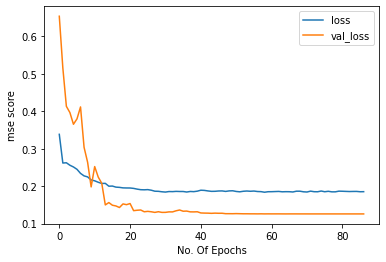

In [75]:
plt.plot(prepared_model.history["loss"],label="loss")
plt.plot(prepared_model.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")


In [76]:
model_LSTM.evaluate(test_generator, verbose=1)

303/303 [==============================] - 1s 5ms/step - loss: 0.1260


0.1259569674730301

In [77]:
predictions=model_LSTM.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,18.451036,51.050423,15.450497,36.894779,10.156054
1,18.614347,52.208458,15.409809,37.346188,10.199883
2,18.416042,52.107681,15.488583,36.961605,10.230260
3,17.740377,50.709457,15.572543,34.879650,10.085601
4,17.945583,50.391037,16.137812,31.643078,9.954268
...,...,...,...,...,...
1207,32.108063,73.379524,22.624950,21.377838,10.761428
1208,41.889992,84.984077,24.902824,20.485592,11.150625
1209,45.683460,87.234261,25.100351,19.349415,11.239130
1210,39.094467,76.936577,22.395222,17.864622,10.539627


In [78]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
2021-08-12 13:00:00,23.360317,24.773974,17.878206,27.673174,9.682980,909.769724,35.6,57.0,5.5,1000.4,...,2,1,1,1,3,18.451036,51.050423,15.450497,36.894779,10.156054
2021-08-12 14:00:00,23.265150,24.278646,17.855543,27.739469,9.688557,909.386900,34.9,60.0,3.7,1000.8,...,2,1,1,1,3,18.614347,52.208458,15.409809,37.346188,10.199883
2021-08-12 15:00:00,22.402865,23.018396,17.832580,27.807624,9.694173,908.986869,33.8,68.0,0.0,1001.3,...,2,1,1,1,3,18.416042,52.107681,15.488583,36.961605,10.230260
2021-08-12 16:00:00,21.096304,22.154228,17.809310,27.877730,9.699825,908.568369,33.3,70.0,0.0,1001.6,...,2,1,1,1,3,17.740377,50.709457,15.572543,34.879650,10.085601
2021-08-12 17:00:00,19.711928,21.790426,17.785726,27.949884,9.705510,908.130017,32.8,73.0,1.8,1002.0,...,2,1,1,1,2,17.945583,50.391037,16.137812,31.643078,9.954268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247257,21.684876,19.913027,10.997194,1016.422158,29.0,91.0,0.0,1007.7,...,4,1,1,1,5,32.108063,73.379524,22.624950,21.377838,10.761428
2021-10-01 21:00:00,58.000000,96.377594,21.543178,19.888464,11.030029,1009.786225,29.0,94.0,0.0,1008.6,...,4,1,1,1,5,41.889992,84.984077,24.902824,20.485592,11.150625
2021-10-01 22:00:00,50.000000,95.480870,21.432849,19.918104,11.053945,1005.930027,28.9,91.0,1.8,1007.6,...,4,1,1,1,4,45.683460,87.234261,25.100351,19.349415,11.239130
2021-10-01 23:00:00,49.000000,94.638354,21.322312,19.974035,11.027061,1002.761085,28.6,91.0,1.8,1007.4,...,4,1,1,1,4,39.094467,76.936577,22.395222,17.864622,10.539627


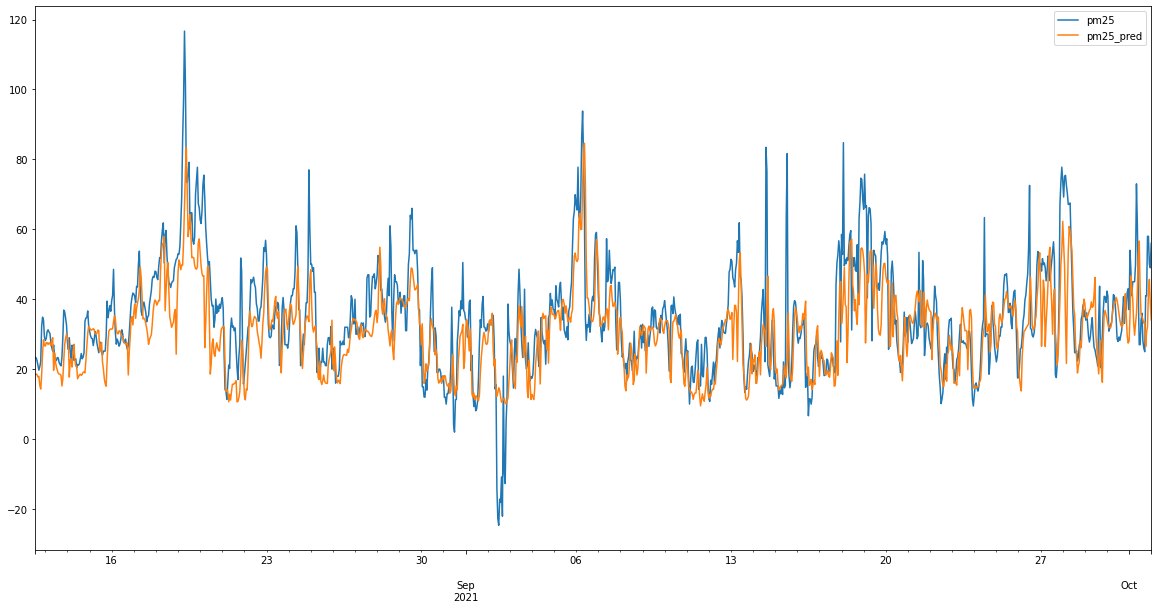

In [79]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

In [80]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mslr": mslr.numpy(),
           }


In [81]:
selected_features = ["pm25", "pm10", "no2", "o3", "so2"]

for feature in selected_features:
    print("-----{}-----".format(feature))
    print(evaluate_preds(y_true=df_final[feature].values,
                         y_pred=df_final["{}_pred".format(feature)].values)
         )

#LSTM MODEL

-----pm25-----
{'mae': 7.877167, 'mse': 120.676735, 'rmse': 10.985296, 'mape': 23.776403, 'mslr': 0.14158244}
-----pm10-----
{'mae': 17.50991, 'mse': 497.62546, 'rmse': 22.30752, 'mape': 36.795933, 'mslr': 0.14325278}
-----no2-----
{'mae': 4.0104637, 'mse': 26.227625, 'rmse': 5.121291, 'mape': 18.375526, 'mslr': 0.05154746}
-----o3-----
{'mae': 8.369154, 'mse': 359.8872, 'rmse': 18.970694, 'mape': 32.09857, 'mslr': 0.2211099}
-----so2-----
{'mae': 2.279464, 'mse': 18.142075, 'rmse': 4.2593513, 'mape': 23.856024, 'mslr': 0.07229237}


###GRU

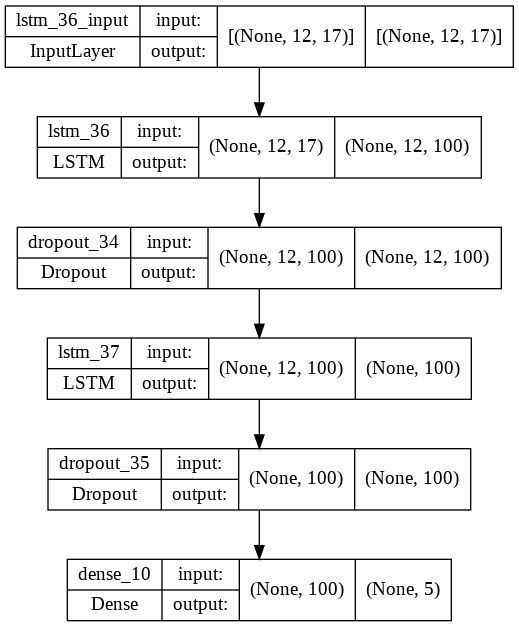

In [82]:
#Importing GRU model
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
model_GRU = Sequential()

model_GRU.add(LSTM(units = 100,activation='relu', return_sequences = True,
                    input_shape=(win_length, num_features)))
model_GRU.add(Dropout(0.4))



model_GRU.add(LSTM(units = 100, activation='relu',return_sequences = False))
model_GRU.add(Dropout(0.4))

model_GRU.add(Dense(targets.shape[1]))

model_GRU.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
                   loss = tf.losses.MeanSquaredLogarithmicError())


tf.keras.utils.plot_model(model=model_GRU, show_shapes=True)



In [83]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model = model_GRU.fit(train_generator, 
                                    validation_data=test_generator,
                                    epochs=200, 
                                    shuffle=False,  
                                    callbacks=[lr_monitor, early_stopping])

Epoch 1/200
2475/2475 [==============================] - 60s 22ms/step - loss: 0.3597 - val_loss: 0.5818 - lr: 0.0010
Epoch 2/200
2475/2475 [==============================] - 55s 22ms/step - loss: 0.2663 - val_loss: 0.5104 - lr: 0.0010
Epoch 3/200
2475/2475 [==============================] - 52s 21ms/step - loss: 0.2647 - val_loss: 0.4544 - lr: 0.0010
Epoch 4/200
2475/2475 [==============================] - 43s 17ms/step - loss: 0.2631 - val_loss: 0.4912 - lr: 0.0010
Epoch 5/200
2475/2475 [==============================] - 46s 18ms/step - loss: 0.2671 - val_loss: 0.3395 - lr: 0.0010
Epoch 6/200
2475/2475 [==============================] - 43s 17ms/step - loss: 0.2549 - val_loss: 0.3563 - lr: 0.0010
Epoch 7/200
2475/2475 [==============================] - 43s 17ms/step - loss: 0.2437 - val_loss: 0.2914 - lr: 0.0010
Epoch 8/200
2475/2475 [==============================] - 42s 17ms/step - loss: 0.2343 - val_loss: 0.2912 - lr: 0.0010
Epoch 9/200
2475/2475 [==============================] -

Text(0, 0.5, 'mse score')

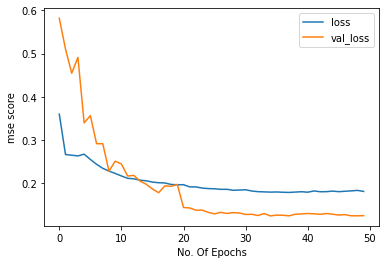

In [84]:
plt.plot(prepared_model.history["loss"],label="loss")
plt.plot(prepared_model.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")


In [85]:
model_GRU.evaluate(test_generator, verbose=1)

303/303 [==============================] - 1s 4ms/step - loss: 0.1241


0.12413521111011505

In [86]:
predictions=model_GRU.predict(test_generator)

pd.DataFrame(predictions)

,0,1,2,3,4
0,16.432735,47.134052,16.778370,30.118383,9.545123
1,16.904831,47.448448,17.003195,30.067326,9.479215
2,17.215631,47.972389,16.935415,29.652565,9.462214
3,17.375912,48.968967,17.106741,29.667688,9.506325
4,17.971436,50.571873,17.847662,28.285961,9.592559
...,...,...,...,...,...
1207,28.507820,74.847038,23.435162,23.011478,10.644433
1208,35.468216,84.406235,24.684734,21.848133,10.821653
1209,36.515007,84.936523,24.474388,20.891054,10.850555
1210,35.927559,79.808517,23.141453,20.565538,10.685160


In [87]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
df_final

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,pm25,pm10,no2,o3,so2,co,temp,rhum,wspd,pres,...,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
2021-08-12 13:00:00,23.360317,24.773974,17.878206,27.673174,9.682980,909.769724,35.6,57.0,5.5,1000.4,...,2,1,1,1,3,16.432735,47.134052,16.778370,30.118383,9.545123
2021-08-12 14:00:00,23.265150,24.278646,17.855543,27.739469,9.688557,909.386900,34.9,60.0,3.7,1000.8,...,2,1,1,1,3,16.904831,47.448448,17.003195,30.067326,9.479215
2021-08-12 15:00:00,22.402865,23.018396,17.832580,27.807624,9.694173,908.986869,33.8,68.0,0.0,1001.3,...,2,1,1,1,3,17.215631,47.972389,16.935415,29.652565,9.462214
2021-08-12 16:00:00,21.096304,22.154228,17.809310,27.877730,9.699825,908.568369,33.3,70.0,0.0,1001.6,...,2,1,1,1,3,17.375912,48.968967,17.106741,29.667688,9.506325
2021-08-12 17:00:00,19.711928,21.790426,17.785726,27.949884,9.705510,908.130017,32.8,73.0,1.8,1002.0,...,2,1,1,1,2,17.971436,50.571873,17.847662,28.285961,9.592559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01 20:00:00,58.000000,97.247257,21.684876,19.913027,10.997194,1016.422158,29.0,91.0,0.0,1007.7,...,4,1,1,1,5,28.507820,74.847038,23.435162,23.011478,10.644433
2021-10-01 21:00:00,58.000000,96.377594,21.543178,19.888464,11.030029,1009.786225,29.0,94.0,0.0,1008.6,...,4,1,1,1,5,35.468216,84.406235,24.684734,21.848133,10.821653
2021-10-01 22:00:00,50.000000,95.480870,21.432849,19.918104,11.053945,1005.930027,28.9,91.0,1.8,1007.6,...,4,1,1,1,4,36.515007,84.936523,24.474388,20.891054,10.850555
2021-10-01 23:00:00,49.000000,94.638354,21.322312,19.974035,11.027061,1002.761085,28.6,91.0,1.8,1007.4,...,4,1,1,1,4,35.927559,79.808517,23.141453,20.565538,10.685160


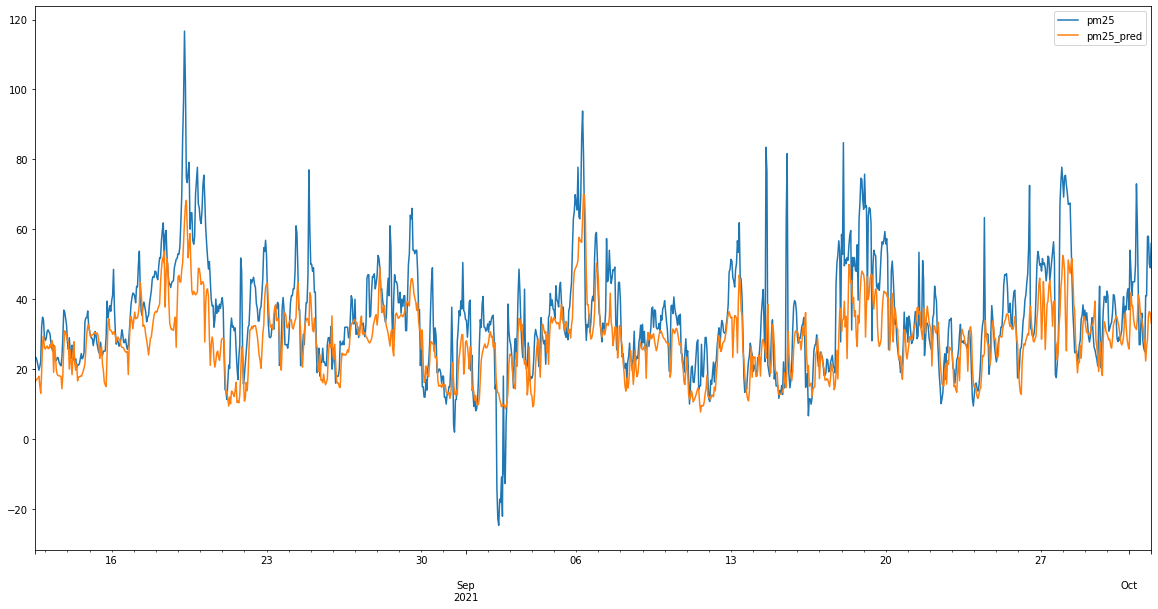

In [88]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

In [89]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mslr": mslr.numpy(),
           }


In [90]:
selected_features = ["pm25", "pm10", "no2", "o3", "so2"]

for feature in selected_features:
    print("-----{}-----".format(feature))
    print(evaluate_preds(y_true=df_final[feature].values,
                         y_pred=df_final["{}_pred".format(feature)].values)
         )

#GRU MODEL

-----pm25-----
{'mae': 8.66538, 'mse': 141.82953, 'rmse': 11.909221, 'mape': 24.758968, 'mslr': 0.15308596}
-----pm10-----
{'mae': 17.349339, 'mse': 477.55115, 'rmse': 21.852943, 'mape': 37.255432, 'mslr': 0.1457711}
-----no2-----
{'mae': 3.8380191, 'mse': 22.83323, 'rmse': 4.778413, 'mape': 18.09891, 'mslr': 0.044573825}
-----o3-----
{'mae': 7.923795, 'mse': 349.06583, 'rmse': 18.683304, 'mape': 30.785748, 'mslr': 0.20847581}
-----so2-----
{'mae': 2.1646812, 'mse': 17.959955, 'rmse': 4.237919, 'mape': 22.273981, 'mslr': 0.068769306}
